Although we can use linear regression for binary classifcation problem it may come right for some assumptions but there will be some (data point) whoose probabllity lomit might come wrong hence, we cannot directly use linear regression for classification

Logistic Regression:
    Binary classification prblem.
    sigmoid (Logistic) 's' shape curve, value as'0'and '1'

we can use logistic regression for more than 2 categorical varaiable but we need to use 'one vs all and one vs one' technique for it

In [8]:
import matplotlib.pyplot as plt
import numpy as np

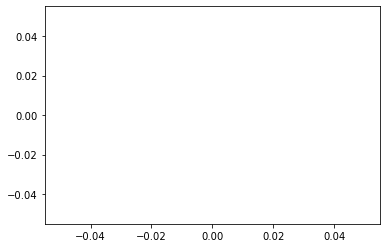

In [9]:
X= np.arange(-10,10,-0.1)
sig = 1/(1+np.power(np.e,-X))
plt.plot(X,sig)
plt.show()

In [10]:
def segmoid(z):
    return 1.0/(1+np.e(-z))

This function returns a probabilty score between 0 to 1. In order to map this to descrete value we select the threshold value p>=0.5, class 1
p<=0.5 calss 2

<function matplotlib.pyplot.show(*args, **kw)>

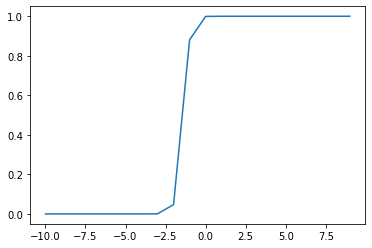

In [11]:
x = np.arange(-10,10-0.1)
lop = 5*x +7
sig = 1/(1+np.power(np.e, -lop))
plt.plot(x,sig)
plt.show

In [12]:
import pandas as pd

In [13]:
data = pd.read_csv('titanic.csv')

In [14]:
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [15]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Survived --------- Target variable. 
Pclass - Yes
Name - No 
Sex - Yes
age - Yes
Sibling/spouses - Yes
 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [17]:
data.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [18]:
data.drop(['Name','Fare'],axis=1, inplace=True)

In [19]:
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


To deal with the text categorical data we have two methods ----- 1. Pandas dummy method
                                                              ---2. sklearn lablel encoding

In [20]:
gender = pd.get_dummies(data["Sex"],drop_first= True) #we need to convert this data into numerical form, as machine dont usderstand the text data

In [21]:
gender #we now transformed male,female data into - 0 and 1

,male
0,1
1,0
2,0
3,0
4,1
...,...
882,1
883,0
884,0
885,1


In [22]:
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [23]:
data.drop(['Sex'],axis=1,inplace=True)

In [24]:
data.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0


I will concatenate the gender col in my data set - i.e adding the gender column in the data

In [25]:
new_data = pd.concat([data,gender],axis=1)

In [26]:
new_data.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [27]:
X = new_data.iloc[:,[1,2,3,4,5]]

In [28]:
X.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,male
0,3,22.0,1,0,1
1,1,38.0,1,0,0
2,3,26.0,0,0,0
3,1,35.0,1,0,0
4,3,35.0,0,0,1


In [29]:
y = new_data.iloc[:,0]

In [30]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [33]:
X_train.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,male
615,2,4.0,2,1,0
678,1,27.0,0,0,1
155,3,16.0,0,0,0
342,2,36.0,0,0,1
847,3,74.0,0,0,1


In [34]:
X_train

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,male
615,2,4.0,2,1,0
678,1,27.0,0,0,1
155,3,16.0,0,0,0
342,2,36.0,0,0,1
847,3,74.0,0,0,1
...,...,...,...,...,...
576,3,32.0,0,0,1
779,3,35.0,1,2,1
625,3,26.0,0,0,1
780,3,25.0,0,0,1


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log = LogisticRegression()

In [37]:
%time log.fit(X_train,y_train)

Wall time: 70.3 ms


LogisticRegression()

In [38]:
log.score(X_test,y_test)

0.8288288288288288

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
predictions = log.predict(X_test)

In [41]:
result = confusion_matrix(y_test,predictions)

In [42]:
result

array([[111,  14],
       [ 24,  73]], dtype=int64)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       125
           1       0.84      0.75      0.79        97

    accuracy                           0.83       222
   macro avg       0.83      0.82      0.82       222
weighted avg       0.83      0.83      0.83       222



support is the number of occurance of the given class in our dataset

In [45]:
data.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0


In [47]:
data['Survived'].value_counts()

0    545
1    342
Name: Survived, dtype: int64

label encodng technique

In [48]:
from sklearn import preprocessing

In [49]:
label_encoder = preprocessing.LabelEncoder()

In [50]:
data1 = pd.read_csv('titanic.csv')

In [51]:
data1.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [56]:
data1["Sex"] = label_encoder.fit_transform(data1["Sex"])

In [57]:
data1.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500
